# Time-lagged edges

This notebook showcases how to create hierarchically coupled causal models with time-lagged edges. 

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from causaldynamics.scm import create_scm_graph
from causaldynamics.plot import  plot_trajectories, plot_scm

from causaldynamics.creator import create_scm, simulate_system

Let's create a the coupled causal model with time-lag edges with probability `time_lag_edge_probability` and a `time_lag` measured in ODE integration steps.

In [13]:
num_nodes = 4
node_dim = 3
num_timesteps = 500
time_lag = 100
time_lag_edge_probability = 0.1

A, W, b, root_nodes, magnitudes = create_scm(
    num_nodes,
    node_dim=node_dim,
    confounders=False,
    graph="scale-free",
    time_lag=time_lag,
    time_lag_edge_probability=time_lag_edge_probability
)

# Print the adjacency matrix
print(f"A has the shape {A.shape} representing (lag, num_nodes, node_dim')")
print(A)

INFO - Creating SCM with 4 nodes and 3 dimensions each...


A has the shape torch.Size([2, 4, 4]) representing (lag, num_nodes, node_dim')
tensor([[[0., 0., 0., 0.],
         [1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 1., 0.]]])


In [15]:
# Let's have a look at the adjacency matrix without time-lag edges:
A[0]

tensor([[0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]])

In [16]:
# and now at the time-lagged edges:
A[1]

tensor([[1., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.]])

To simulate the system with time-lagged edged, we can use the `simulate_system` function: 

In [20]:
da = simulate_system(
            A, W, b,
            num_timesteps=num_timesteps,
            num_nodes=num_nodes,
            init_ratios=[1., 0.],
            init=None,
            standardize=False,
            system_name="random",
            time_lag=5,
            make_trajectory_kwargs={"resample": True, "noise": 0.}
        )


INFO - Simulating random system for 500 timesteps...


And finally, let's have a look at the graph and the trajectories. Dashed lines visualize time-lag edges and continuous lines non-time-lagged egdes. Dash-dotted lines show both a time-lagged edge and a non-time-lagged edge.

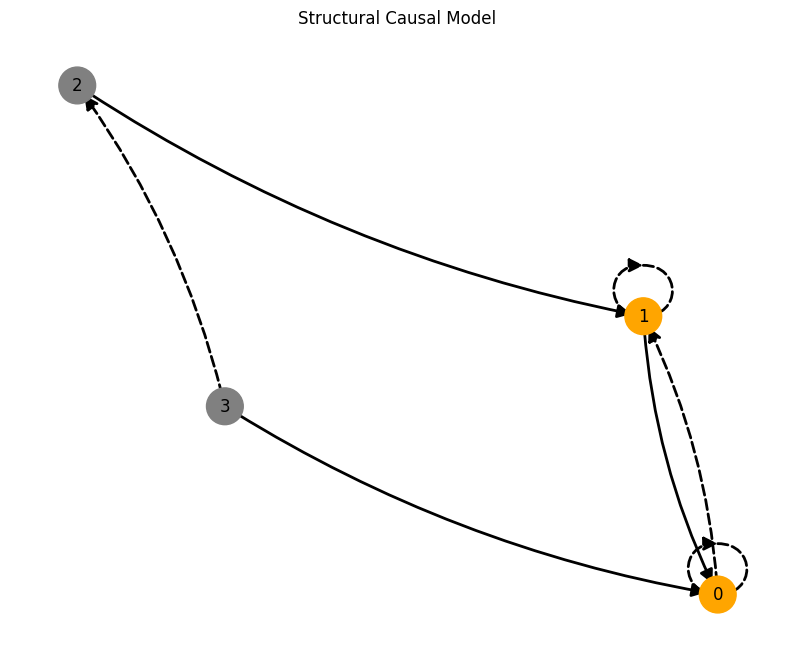

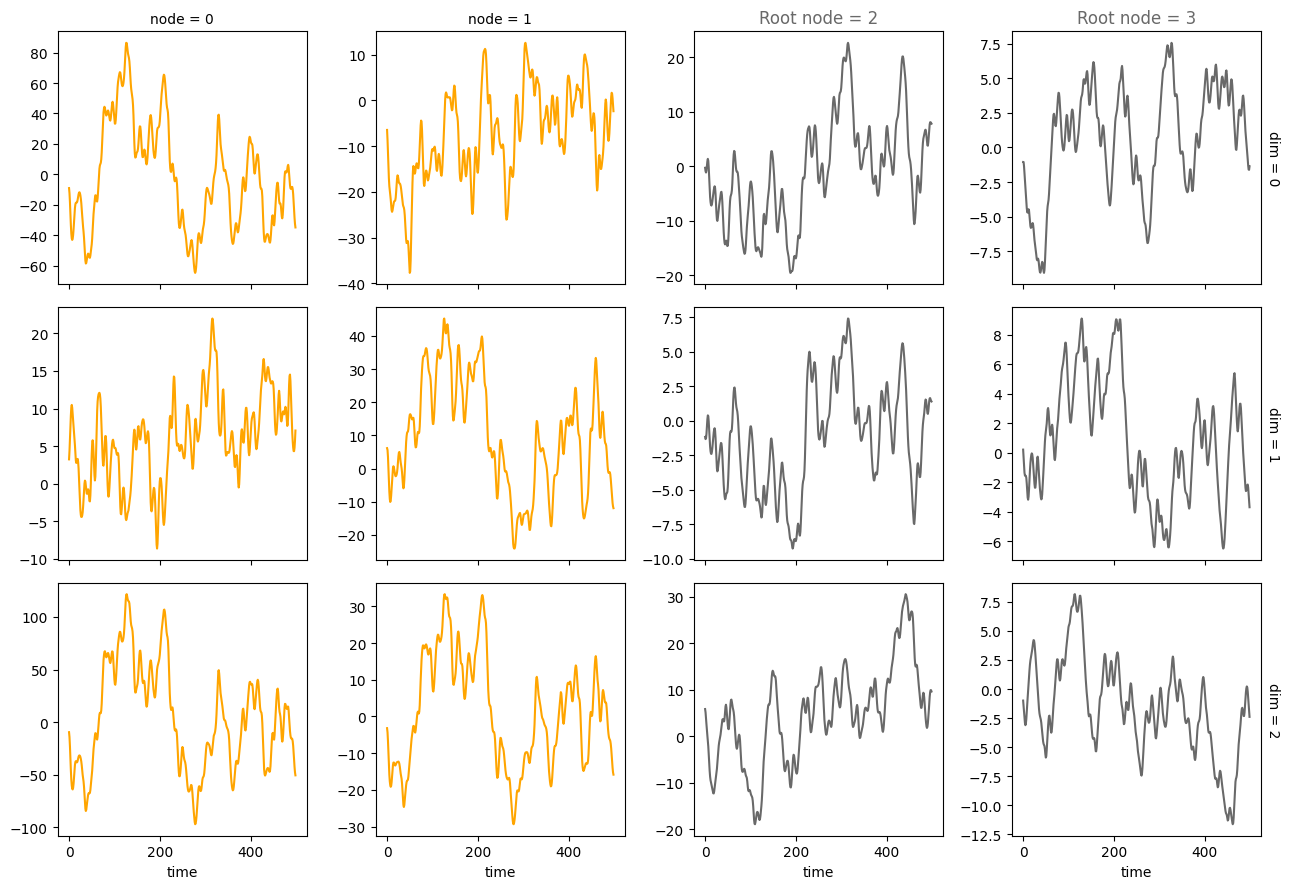

In [21]:
plot_scm(G=create_scm_graph(A), root_nodes=root_nodes)
plt.show()

# Plot the trajectories
plot_trajectories(da, root_nodes, sharey=False)
plt.show()

# # Animate the trajectories (takes a while to run...)
# mpl.rcParams['animation.embed_limit'] = 50 * 1024**2  # Increase the memory limit to 50MB
# anim = animate_3d_trajectories(da, frame_skip=5, rotation_speed=0.2, rotate=True , show_history=True, plot_type='subplots', root_nodes=root_nodes)
# display(anim)
